In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import layers
from keras import callbacks
from keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
X = train_data.drop(columns=["PassengerId", "Survived", "Name", "Ticket"])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [105]:
y = train_data["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [106]:
X_without_cabin = X.drop(columns="Cabin")
X_without_cabin.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [107]:
def print_nans(data):
  for col in data.columns:
    nans = data[col].isna().sum()
    if nans > 0:
      print(col + " " + str(nans))

print_nans(X_without_cabin)

Age 177
Embarked 2


In [108]:
numerical_cols = [col for col in X_without_cabin.columns if X_without_cabin[col].dtype in ["int64", "float64"]]
categorical_cols = [col for col in X_without_cabin.columns if X_without_cabin[col].dtype == "object"]

numerical_transformer = Pipeline(
  steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
  ]
)
categorical_transformer = Pipeline(
  steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
  ]
)

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
  ]
)

In [109]:
print(numerical_cols)
print(categorical_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


In [110]:
X_without_cabin = pd.DataFrame(preprocessor.fit_transform(X_without_cabin))
X_without_cabin.head()

,0,1,2,3,4,5,6,7,8,9
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X_without_cabin, y, random_state=1, train_size=0.7)

Epoch 1/1000
20/20 [==============================] - 1s 18ms/step - loss: 0.7908 - binary_accuracy: 0.5859 - val_loss: 0.6678 - val_binary_accuracy: 0.5709
Epoch 2/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.6843 - binary_accuracy: 0.6340 - val_loss: 0.6439 - val_binary_accuracy: 0.5821
Epoch 3/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.6359 - binary_accuracy: 0.6998 - val_loss: 0.6196 - val_binary_accuracy: 0.6119
Epoch 4/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.5936 - binary_accuracy: 0.7400 - val_loss: 0.5989 - val_binary_accuracy: 0.6455
Epoch 5/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.5437 - binary_accuracy: 0.7384 - val_loss: 0.5860 - val_binary_accuracy: 0.6866
Epoch 6/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.5362 - binary_accuracy: 0.7576 - val_loss: 0.5530 - val_binary_accuracy: 0.7463
Epoch 7/1000
20/20 [==============================] - 0s 7ms/st

<AxesSubplot:>

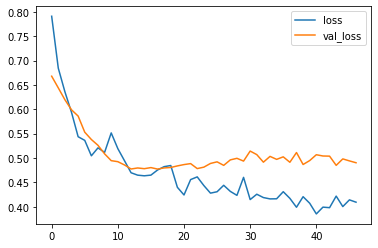

In [112]:
n = 256

model = keras.Sequential([
  layers.Dense(n, activation="relu",input_shape=[X_train.shape[1]]),
  layers.Dropout(0.5),
  layers.Dense(n, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(n, activation="relu"),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Dense(n, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(n, activation="relu"),
  layers.BatchNormalization(),
  layers.Dense(1, activation="sigmoid"),
])

model.compile(
  optimizer="adam",
  loss="binary_crossentropy",
  metrics=["binary_accuracy"]
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001,
    patience=30,
    restore_best_weights=True,
)

history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  epochs=1000,
  batch_size=32,
  callbacks=[early_stopping],
  verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [113]:
def make_submission(model, test_data):
  predictions = model.predict(test_data)
  final_predictions = []
  for i in range(len(predictions)):
    if predictions[i][0] < 0.5:
      final_predictions.append(0)
    else:
      final_predictions.append(1)
  predictions_df = pd.DataFrame(data={"PassengerId": range(892, 892 + len(test_data)), "Survived": final_predictions})
  predictions_df.to_csv("submission.csv", index=False)

X_test = pd.read_csv("test.csv")
X_test.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])
X_test = pd.DataFrame(preprocessor.transform(X_test))
make_submission(model, X_test)

14/14 [==============================] - 0s 1ms/step


In [116]:
baseline_prediction = []
test_data = pd.read_csv("test.csv")
for person in test_data["Sex"]:
  if person == "male":
    baseline_prediction.append(0)
  else:
    baseline_prediction.append(1)

predictions_df = pd.DataFrame(data={"PassengerId": range(892, 892 + len(test_data)), "Survived": baseline_prediction})
predictions_df.to_csv("baseline_submission.csv", index=False)